In [ ]:
import re
import pandas as pd
import nltk
import string
from plotly import graph_objects as go
# import plotly.express as px
import numpy as np

nltk.download("stopwords")
stopword_list = nltk.corpus.stopwords.words("english")


def read_file(filename):
    """
    Converts given text file into dataframe with cols of label and
    (positive, negative, neutral)
    """
    tweet_df = pd.read_csv(filename, sep="\t", lineterminator="\n")
    tweet_df.columns = ["label", "tweet"]
    return tweet_df


# TODO: replace contractions? emojis?
def clean_tweet(tweet):
    """
    tweet: string
    returns: cleaned tweet (string)
    """
    tweet = tweet.lower()
    # remove punctuation
    tweet = "".join([c for c in tweet if c not in string.punctuation])
    # remove stop words
    tweet = "".join([(c + " ") for c in tweet.split(" ") if c not in stopword_list])
    # remove all @mentions
    tweet = re.sub(r"(@.*?)[\s]", " ", tweet)
    # remove twitter URL at end of tweet (https://t.co/...)
    tweet = re.sub("http[s]?://\S+", "", tweet)
    return tweet


def visualize_tweets(tweet_df):
    """
    tweet_df: dataframe
    """
    index = ["negative", "neutral", "positive"]

    tweet_u, tweet_counts = np.unique(tweet_df["label"], return_counts=True)
    text = [round(x / len(tweet_df), 3) for x in tweet_counts]
    fig = go.Figure(
        data=[
            go.Bar(
                name="Tweets",
                x=index,
                y=tweet_counts / len(tweet_df),
                text=text,
            ),
        ],
        layout=go.Layout(
            title="Proportion of Tweets by Sentiment",
            yaxis_title="Proportion of Total Tweets",
        ),
    )
    fig.show()


def preprocess_tweets(filename):
    tweet_df = read_file(filename)
    tweet_df["tweet"] = tweet_df["tweet"].apply(clean_tweet)
    return tweet_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

label_dict = {"negative": 0, "neutral": 1, "positive": 2}

def extract_features(filename):
    tweets_df = preprocess_tweets(filename)

    sid = SentimentIntensityAnalyzer()
    tweets_df["sentiment"] = tweets_df["tweet"].apply(
        lambda x: sid.polarity_scores(x).get("compound")
    )
    tweets_df["subjectivity"] = tweets_df["tweet"].apply(
        lambda x: TextBlob(x).sentiment.subjectivity
    )
    tweets_df["num_tokens"] = tweets_df["tweet"].apply(lambda x: len(x.split(" ")))
    tweets_df["label"] = tweets_df["label"].apply(lambda x : label_dict[x])

    return tweets_df

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


0.5631399317406144

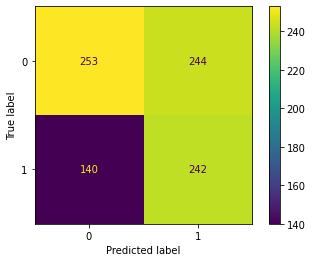

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# def get_sentiment_label(x):
#   if (x < -0.05):
#     return -1
#   if (x > 0.05):
#     return 1
#   else:
#     return 0

def get_sentiment_label(x):
  if (x < 0):
    return 0
  if (x >= 0):
    return 1

def baseline_predictor():
    tweets_df = extract_features("final_tweets_test.txt")
    tweets_df=tweets_df[tweets_df.label != 2]
    tweets_df["prediction"] = tweets_df["sentiment"].apply(get_sentiment_label)
    correct_prediction = tweets_df[tweets_df["prediction"] == tweets_df["label"]]
    accuracy = len(correct_prediction) / len(tweets_df)


    ConfusionMatrixDisplay.from_predictions(tweets_df["label"], tweets_df["prediction"])

    return accuracy

baseline_predictor()

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.0 MB 10.8 MB/s 
     |████████████████████████████████| 6.6 MB 37.8 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 596 kB 36.8 MB/s 
     |████████████████████████████████| 895 kB 19.8 MB/s 


In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 12.9 MB/s 


In [ ]:
from transformers import AlbertTokenizer
from transformers import TFAlbertForSequenceClassification
import sentencepiece

model = TFAlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=3)
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.1M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFAlbertForSequenceClassification.

Some layers of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/742k [00:00<?, ?B/s]

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
test_tweets_df = preprocess_tweets("final_tweets_test.txt")
train_tweets_df=preprocess_tweets("final_tweets_training.txt")
label_dict = {"negative": 0, "neutral": 2, "positive": 1}
test_tweets_df["label"] = test_tweets_df["label"].apply(lambda x : label_dict[x])
train_tweets_df["label"] = train_tweets_df["label"].apply(lambda x : label_dict[x])



In [ ]:
test_tweets_df
# train_tweets_df

train,val = train_test_split(test_tweets_df, test_size=0.2)

In [ ]:
val

,label,tweet
542,2,anxiety feel group text turns green thunderous
61,2,breaking chicago cubs third baseman kris bryan...
536,2,thats twice ol joe asked voter wanted step out...
275,1,hate talking fucking virus im trying add anxie...
133,0,sick sky news economics editor ed conway write...
...,...,...
2,0,turns donald trump potentially exposed coronav...
1256,0,irresponsible pretending coronavirus cases don...
855,2,news imelda staunton play queen elizabeth ii ...
392,1,celebrate release quentinblakehqs gorgeous new...


In [ ]:
from transformers import InputExample, InputFeatures
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=60):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'tweet'
LABEL_COLUMN = 'label'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, val, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
#               metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [ ]:
# model.fit(train_data, epochs=3, validation_data=validation_data)
model.fit(train_data, 
          epochs=3, 
          validation_data=validation_data)

Epoch 1/3
66/66 [==============================] - 110s 800ms/step - loss: 0.9343 - accuracy: 0.5544 - val_loss: 0.8870 - val_accuracy: 0.5543
Epoch 2/3
66/66 [==============================] - 49s 735ms/step - loss: 0.6941 - accuracy: 0.6983 - val_loss: 1.0173 - val_accuracy: 0.5659
Epoch 3/3
66/66 [==============================] - 49s 745ms/step - loss: 0.5209 - accuracy: 0.8003 - val_loss: 1.1409 - val_accuracy: 0.5310


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

0.5310077519379846


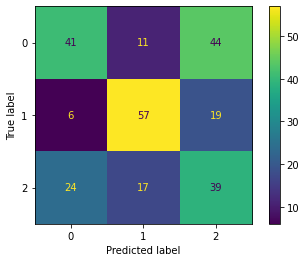

In [ ]:
pred_sentences=val['tweet'].values.tolist()

tf_batch = tokenizer(pred_sentences, max_length=60, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
ConfusionMatrixDisplay.from_predictions(val["label"], label)
print(accuracy_score(val['label'],label))

In [ ]:
#drop neutral
test_tweets_df=test_tweets_df[test_tweets_df.label != 2]
train_tweets_df=train_tweets_df[train_tweets_df.label != 2]

train,val = train_test_split(test_tweets_df, test_size=0.2)

train_InputExamples, validation_InputExamples = convert_data_to_examples(train, val, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model2 = TFAlbertForSequenceClassification.from_pretrained("albert-base-v2")
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

All model checkpoint layers were used when initializing TFAlbertForSequenceClassification.

Some layers of TFAlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model2.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
46/46 [==============================] - 58s 821ms/step - loss: 0.4586 - accuracy: 0.7838 - val_loss: 0.3556 - val_accuracy: 0.8785
Epoch 2/3
46/46 [==============================] - 34s 747ms/step - loss: 0.2153 - accuracy: 0.9247 - val_loss: 0.4321 - val_accuracy: 0.8508
Epoch 3/3
46/46 [==============================] - 35s 751ms/step - loss: 0.1165 - accuracy: 0.9662 - val_loss: 0.5663 - val_accuracy: 0.8729


0.8729281767955801
0.8435374149659863


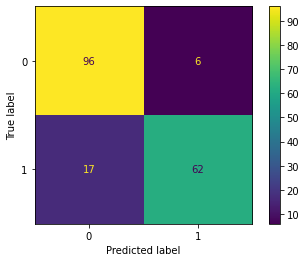

In [ ]:
pred_sentences=val['tweet'].values.tolist()

tf_batch = tokenizer(pred_sentences, max_length=60, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model2(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
ConfusionMatrixDisplay.from_predictions(val["label"], label)
print(accuracy_score(val['label'],label))
print(f1_score(val['label'],label))